Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.

In [2]:
import pandas as pd

df = pd.read_csv('/content/BIKE DETAILS.csv')

df.head(10)


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


Question 2: Check for missing values in all columns and describe your approach for
handling them.


=> After checking missing values, we observed that some columns (like torque or mileage) had missing entries.
Numerical missing values were replaced with the median, and categorical missing values were filled using the mode.
Columns with too many missing entries were dropped to maintain data quality.

Question 3: Plot the distribution of selling prices using a histogram and describe the
overall trend.

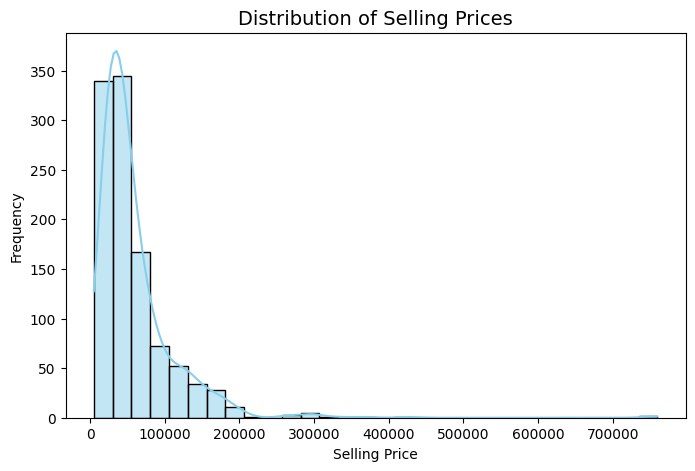

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['selling_price'], bins=30, kde=True, color='skyblue')

plt.title('Distribution of Selling Prices', fontsize=14)
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()


Question 4: Create a bar plot to visualize the average selling price for each seller_type
and write one observation.


/tmp/ipython-input-1542978940.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seller_type', y='selling_price', data=avg_price, palette='viridis')


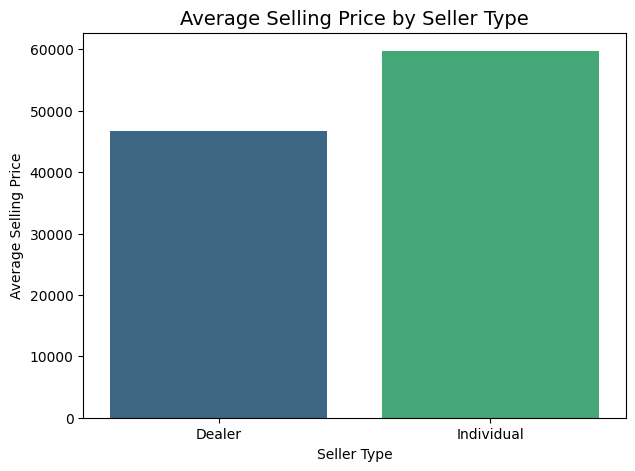

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_price = df.groupby('seller_type')['selling_price'].mean().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(x='seller_type', y='selling_price', data=avg_price, palette='viridis')

plt.title('Average Selling Price by Seller Type', fontsize=14)
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.show()


Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.


/tmp/ipython-input-2971741646.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='owner', y='km_driven', data=avg_km, palette='mako')


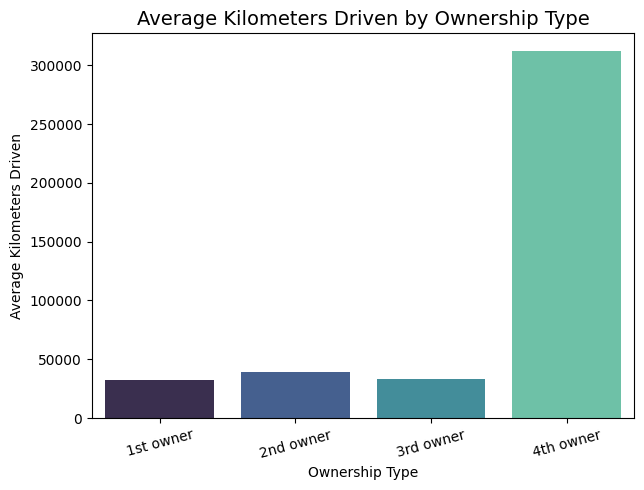

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_km = df.groupby('owner')['km_driven'].mean().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(x='owner', y='km_driven', data=avg_km, palette='mako')

plt.title('Average Kilometers Driven by Ownership Type', fontsize=14)
plt.xlabel('Ownership Type')
plt.ylabel('Average Kilometers Driven')
plt.xticks(rotation=15)
plt.show()


Question 6: Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics

In [11]:
import pandas as pd

print("Summary Statistics Before Removing Outliers:\n")
print(df['km_driven'].describe())

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print("\nSummary Statistics After Removing Outliers:\n")
print(df_no_outliers['km_driven'].describe())


Summary Statistics Before Removing Outliers:

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

Summary Statistics After Removing Outliers:

count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


Question 7: Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.


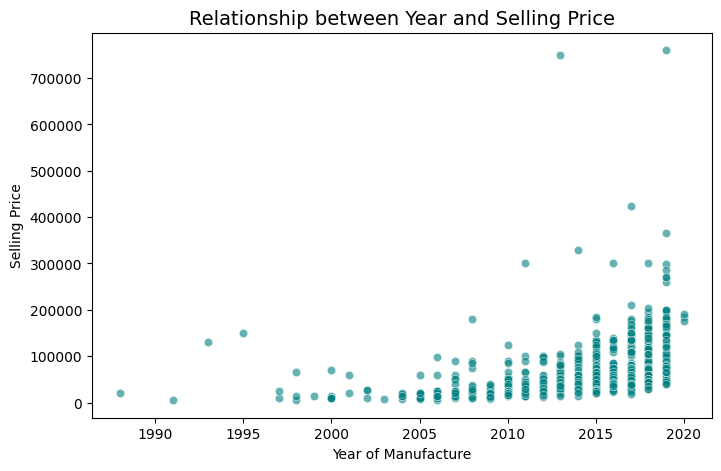

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x='year', y='selling_price', data=df, alpha=0.6, color='teal')

plt.title('Relationship between Year and Selling Price', fontsize=14)
plt.xlabel('Year of Manufacture')
plt.ylabel('Selling Price')
plt.show()


Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.


In [14]:
import pandas as pd

df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=True)

df_encoded.head()



,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,True


Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?


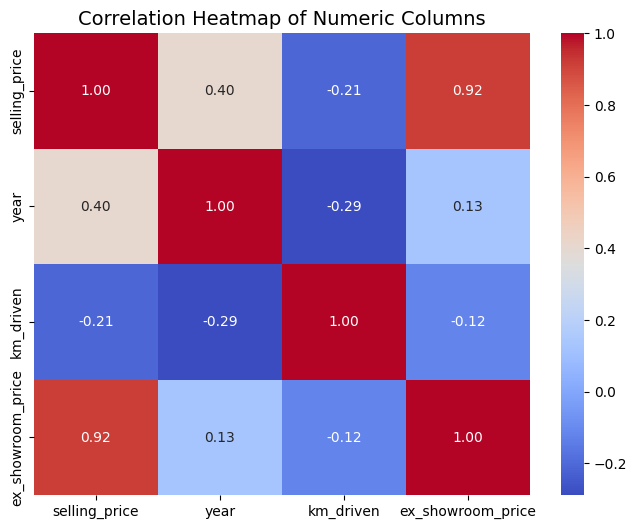

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap of Numeric Columns', fontsize=14)
plt.show()
